In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')

# Add 'overweight' column

df['overweight'] = np.where(df['weight'] / ((df['height'] * 0.01) ** 2 ) > 25, 1, 0)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [5]:
# Normalize data by making 0 always good and 1 always bad. 
# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = np.where(df['cholesterol'] == 1, 0, 1)
df['gluc'] = np.where(df['gluc'] == 1, 0, 1)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


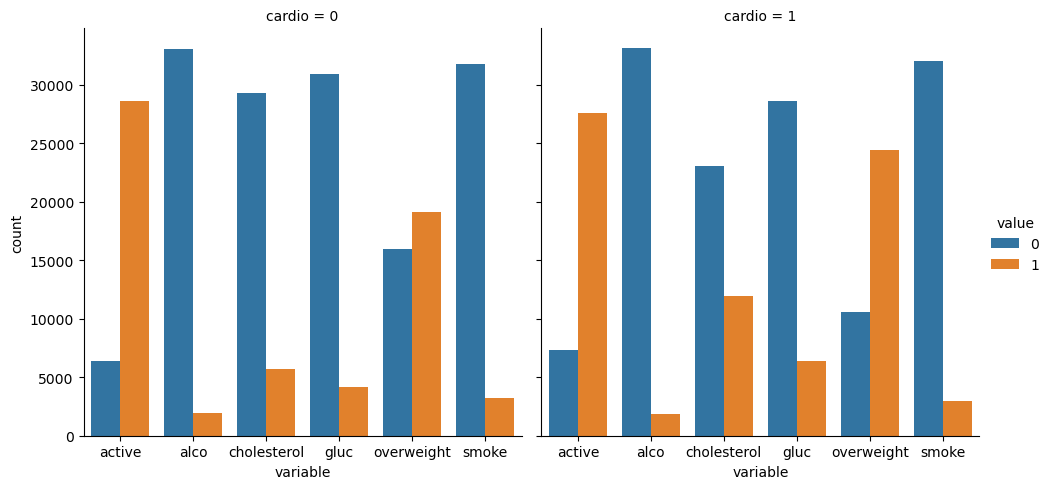

In [7]:
# Create DataFrame for cat plot using 'pd.melt'
# using just value from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'
df_cat = sorted(['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

# Group and reformat the data to split it by 'cardio'.
# Show the counts of each feature. You will have to rename one of the colums for the catplot to work correctly.
df_cat = pd.melt(df, id_vars='cardio', value_vars=df_cat)

# Draw the catplot with 'sns.catplot()'
sns.catplot(x='variable', col='cardio', hue='value', kind='count', data=df_cat)



            

In [ ]:
# Generate a mask for the upper triangle 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True 

In [102]:
# Set up the matplotlib figure 
fig, ax = plt.subplots(figsize=(6,6))

ax = sns.heatmap(corr,vmin=0, vmax=0.25, annot=True, fmt='.1f', linewidths=0, square=True, mask=mask)

Index(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


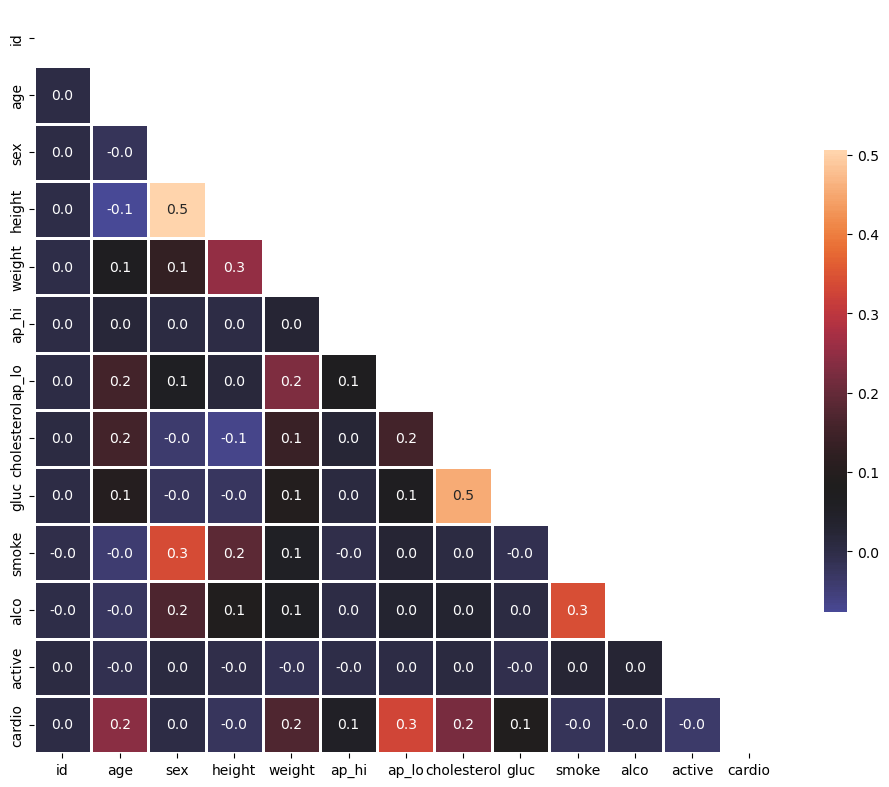

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('medical_examination.csv')
print(df.columns)

# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[
        (df['ap_lo'] <= df["ap_hi"]) & 
        (df["height"] >= df["height"].quantile(0.025))&
        (df["height"] <= df["height"].quantile(0.975))& 
        (df["weight"] >= df["weight"].quantile(0.025))&
        (df["weight"] <= df["weight"].quantile(0.975))]
    
    # Calculate the correlation matrix 
    corr = df_heat.corr(method="pearson")
    
    # Create a mask for the upper triangle of the heatmap
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Plot the heatmap
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, linewidths=1, annot=True, square=True, mask=mask, fmt=".1f",
                center=0.08, cbar_kws={"shrink": 0.5})
    
    # Save the figure
    fig.savefig('heatmap.png')
    return fig

# Call the function to draw the heatmap
draw_heat_map()
